# **Transfer Learning usando o Conjunto de Dados "Cats and Dogs"**

### **1.Introdução**

<p align="justify">
No campo em constante evolução do Aprendizado de Máquina, abordagens inovadoras como o Transfer Learning têm se destacado como uma ferramenta poderosa para impulsionar o desempenho e a eficácia de modelos em uma variedade de tarefas. Este projeto tem como objetivo explorar o potencial do Transfer Learning ao empregar o conjunto de dados "Cats and Dogs", disponível no Kaggle, para aprimorar a capacidade de classificação de imagens de gatos e cachorros.
<p align="justify">
O conjunto de dados "Cats and Dogs" é um marco na comunidade de Aprendizado de Máquina, servindo como uma base sólida para a compreensão e aplicação prática do Transfer Learning. Neste projeto, vamos mergulhar no conceito de Transfer Learning, que se baseia na premissa de que modelos pré-treinados em tarefas relacionadas podem ser ajustados e adaptados para novas tarefas com uma quantidade menor de dados e recursos computacionais.
<p align="justify">
Ao utilizar esse conjunto de dados, exploraremos como os modelos de Aprendizado de Máquina podem aprender com o conhecimento prévio acumulado ao serem treinados em grandes conjuntos de dados, como ImageNet. Aproveitaremos essa vantagem para desenvolver modelos de classificação capazes de distinguir entre imagens de gatos e cachorros com alta precisão, mesmo quando nossos próprios dados de treinamento são limitados.

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import ticker

In [2]:
%matplotlib inline

### **2. Pré-Processamento de Dados**

In [3]:
# Carregando bibliotecas

import os
import random

In [4]:
# Definindo os diretórios dos conjuntos de dados

imagens_treino = '/content/drive/MyDrive/Projetos/Transfer Learning/train'
imagens_teste = '/content/drive/MyDrive/Projetos/Transfer Learning/test'

In [5]:
# Gerando listas com os dados de treino e teste e verificando a quantidade

# Lista com os dados de treino
pictures_train = ['/content/drive/MyDrive/Projetos/Transfer Learning/train/{}'.format(
    i) for i in os.listdir(imagens_treino)]

# Lista com dados de teste
pictures_teste = ['/content/drive/MyDrive/Projetos/Transfer Learning/test/{}'.format(
    i) for i in os.listdir(imagens_teste)]

# Imprimindo resultado
print('Quantidade de imagens de treino: {train} e teste: {test}'.format(
    train = len(pictures_train), test = len(pictures_teste)
))

Quantidade de imagens de treino: 400 e teste: 100


In [6]:
# Aleatorizando as imagens de treinamento

random.shuffle(pictures_train)

### **3. Pré-Processamento das Imagens**

In [7]:
# Definindo as dimensões das imagens de entrada

nrows = 150     # Definindo o número de linhas
ncolumns = 150  # Definindo o número de colunas
channels = 3    # Definindo imagens com coloridas

In [8]:
# Criando uma função para resize das imagens e definir os valores para as classes

def processamento_de_imagens(lista_de_imagens):
  X = []
  y = []

  for imagem in lista_de_imagens:
      imagem_ = Image.open(imagem)
      X.append(np.asarray(imagem_.resize((nrows, ncolumns))))

      if 'dog' in imagem:
         y.append(1)
      elif 'cat' in imagem:
         y.append(0)

  return X, y

In [9]:
# Aplicando função aos dados disponíveis em pictures_train

X, y = processamento_de_imagens(pictures_train)

In [10]:
# Transformando a lista de imagens e suas classes em array

X = np.array(X)
y = np.array(y)

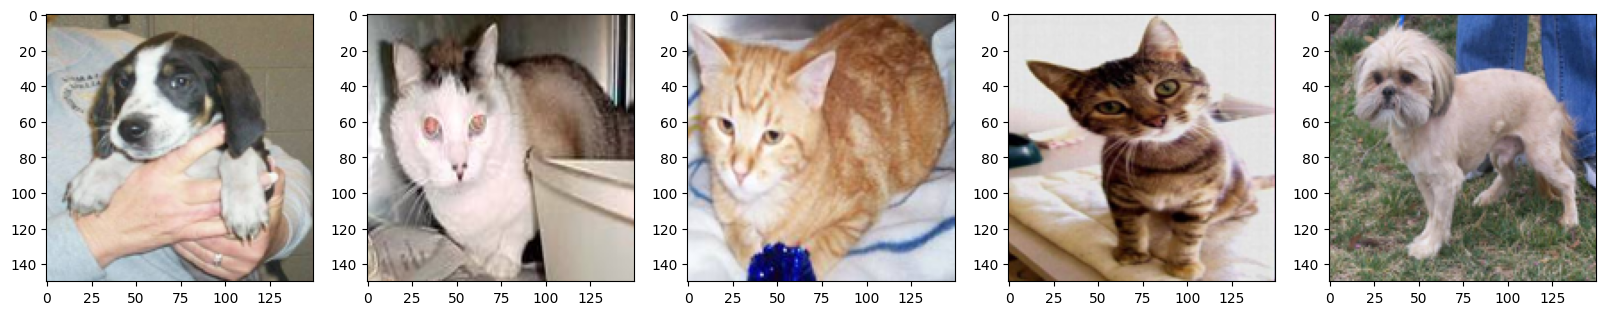

In [11]:
# Visualizando algumas imagens

plt.figure(figsize = (20, 10))
columns = 5

for i in range(columns):
  plt.subplot(int(5 / columns + 1), int(columns), i + 1)
  plt.imshow(X[i])

### **4. Separando os Dados de Treino e Teste**

In [12]:
# Carregando biblioteca

from sklearn.model_selection import train_test_split

In [13]:
# Dividindo os dados: 70% para treino e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size = 0.3,
                                                        random_state = 0)

### **5. Criando Modelo a partir do ImageNet**

**O que é o ImageNet?**
<p align="justify">
ImageNet é um conjunto de dados massivo e uma competição na área de visão computacional. Foi lançado pela primeira vez em 2009 e se tornou um marco importante para a comunidade de aprendizado de máquina e visão computacional.
<p align="justify">
O conjunto de dados ImageNet contém milhões de imagens de alta resolução que abrangem uma ampla variedade de categorias. Originalmente, ele foi projetado para avaliar algoritmos de reconhecimento de objetos em imagens. Cada imagem é anotada com rótulos que indicam a categoria do objeto presente na imagem. Inicialmente, o ImageNet continha aproximadamente 1,2 milhão de imagens em mais de 1.000 categorias.
<p align="justify">
O ImageNet foi usado extensivamente como um conjunto de dados de referência para avaliar a eficácia de diferentes abordagens de aprendizado de máquina e modelos de redes neurais. Modelos pré-treinados no ImageNet, especialmente aqueles que foram treinados em arquiteturas profundas, como as redes neurais convolucionais (CNNs), tornaram-se a base para o Transfer Learning em uma variedade de tarefas de visão computacional. Isso ocorre porque esses modelos aprenderam uma ampla variedade de características visuais genéricas durante o treinamento no ImageNet, que podem ser transferidas e ajustadas para outras tarefas de classificação de imagens, detecção de objetos e segmentação.

In [14]:
# Carregando o ImageNet

import tensorflow as tf
rede_conv = tf.keras.applications.InceptionResNetV2(weights = 'imagenet',
                                                    include_top = False,
                                                    input_shape = (150, 150, 3))

In [15]:
# Verificando a arquitetura da rede

rede_conv.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                

### **5.1 - Criando um modelo utilizando a rede convolucional como base**

In [16]:
# Carregando bibliotecas

from keras import layers
from keras import models

In [17]:
# Criando o modelo

modelo = models.Sequential()
modelo.add(rede_conv)
modelo.add(layers.Flatten())
modelo.add(layers.Dense(256, activation = 'relu'))
modelo.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
# Verificando a arquitetura do modelo

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 256)               3539200   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [19]:
# Verificando o número de pesos a ajustar com a rede pré-treinada e após

print('Número de pesos ajustáveis sem utilizar a rede convolucional: {}'.format(
    len(modelo.trainable_weights)
))
rede_conv.trainable = False
print('Número de pesos ajustáveis utilizando a rede convolucional: {}'.format(
    len(modelo.trainable_weights)
))

Número de pesos ajustáveis sem utilizar a rede convolucional: 492
Número de pesos ajustáveis utilizando a rede convolucional: 4


### **6. Previnindo Overfitting**

* Nessa sessão, utilizaremos o Data Augmentation para previnir o overfitting. Mas afinal, o que é Overfitting e Data Augmentation?

**Overfitting**
<p align="justify">
Overfitting é um fenômeno comum no campo de Aprendizado de Máquina e estatística, onde um modelo se ajusta excessivamente aos dados de treinamento a ponto de capturar o ruído ou variações aleatórias presentes nesses dados. Em outras palavras, um modelo overfitting se torna muito complexo e se adapta tão bem aos dados de treinamento que começa a perder a capacidade de generalizar para novos dados não vistos, resultando em um desempenho pobre em situações reais.

**Data Augmetation**
<p align="justify">
O Data Augmentation, ou "Aumento de Dados", é uma técnica amplamente utilizada no campo de visão computacional e aprendizado de máquina para aumentar a quantidade e diversidade dos dados de treinamento, criando variações artificiais das imagens originais. Essas variações incluem transformações como rotações, espelhamentos, mudanças de escala, corte, alterações de contraste e brilho, entre outras.

A importância do Data Augmentation reside em vários benefícios fundamentais:
* Aumento da Variedade de Dados;
* **Prevenção de Overfitting**;
* Melhoria do Desempenho;
* entre outras.

In [20]:
# Dados Treino
dados_treino = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

# Dados Teste
dados_teste = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1. / 255)

n_treino = len(X_treino)
n_teste = len(X_teste)
lote = 32

# Gerando dados de treino e teste
df_train = dados_treino.flow(X_treino, y_treino, batch_size = lote)
df_test = dados_teste.flow(X_teste, y_teste, batch_size = lote)

In [21]:
# Criando um modelo binário para treinamento das imagens

modelo.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate = 2e-5),
               metrics = ['acc'])

resultado = modelo.fit(df_train,
                       steps_per_epoch = n_treino // lote,
                       epochs = 20,
                       validation_data = df_test,
                       validation_steps = n_teste // lote)

Epoch 1/20
8/8 [==============================] - 72s 7s/step - loss: 0.8500 - acc: 0.7218 - val_loss: 0.2364 - val_acc: 0.9375
Epoch 2/20
8/8 [==============================] - 37s 5s/step - loss: 0.2202 - acc: 0.9032 - val_loss: 0.1659 - val_acc: 0.9375
Epoch 3/20
8/8 [==============================] - 50s 6s/step - loss: 0.1744 - acc: 0.9395 - val_loss: 0.1752 - val_acc: 0.9167
Epoch 4/20
8/8 [==============================] - 49s 6s/step - loss: 0.1781 - acc: 0.9180 - val_loss: 0.2710 - val_acc: 0.9479
Epoch 5/20
8/8 [==============================] - 48s 6s/step - loss: 0.1625 - acc: 0.9355 - val_loss: 0.1804 - val_acc: 0.9583
Epoch 6/20
8/8 [==============================] - 40s 5s/step - loss: 0.1666 - acc: 0.9516 - val_loss: 0.1622 - val_acc: 0.9583
Epoch 7/20
8/8 [==============================] - 49s 6s/step - loss: 0.1440 - acc: 0.9435 - val_loss: 0.2618 - val_acc: 0.9375
Epoch 8/20
8/8 [==============================] - 51s 6s/step - loss: 0.1529 - acc: 0.9315 - val_loss: 0

### **7. Métricas do Modelo**

In [22]:
# Visualizando métricas do modelo

acc = resultado.history['acc']            # Acurácia de Treino
val_acc = resultado.history['val_acc']    # Acurácia de Teste
loss = resultado.history['loss']          # Perda em treinamento
val_loss = resultado.history['val_loss']  # Perda em teste
epochs = range(1, len(acc) + 1)

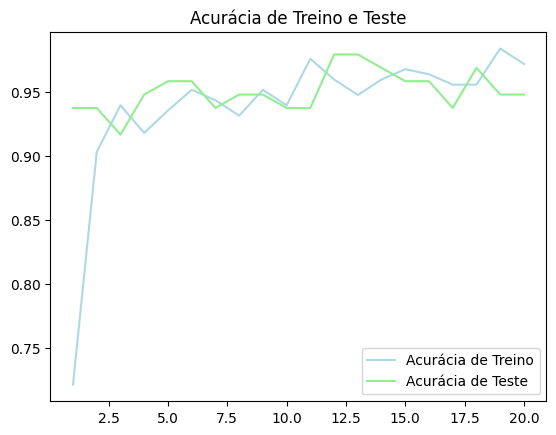

In [23]:
# Visualizando acurácia de treino e teste

plt.plot(epochs, acc, 'lightblue', label = 'Acurácia de Treino')
plt.plot(epochs, val_acc, 'lightgreen', label = 'Acurácia de Teste')
plt.title('Acurácia de Treino e Teste')
plt.legend();

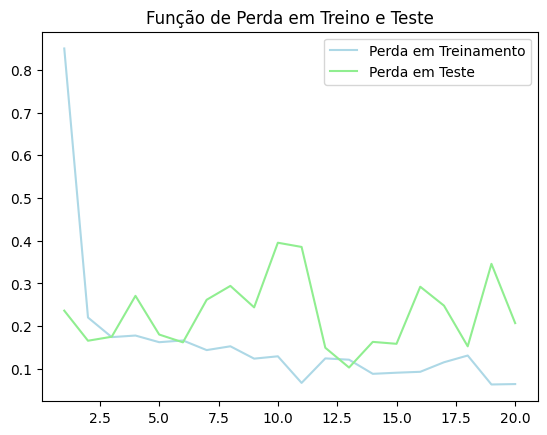

In [25]:
# Função perda dos dados de treino e teste

plt.figure()
plt.plot(epochs, loss, 'lightblue', label = 'Perda em Treinamento')
plt.plot(epochs, val_loss, 'lightgreen', label = 'Perda em Teste')
plt.title('Função de Perda em Treino e Teste')
plt.legend()

plt.show();

In [26]:
# Criando uma função para suavizar os dados e melhorar a visualização

def suaviza(points, factor = 0.7):
  suaviza_pontos = []

  for point in points:
    if suaviza_pontos:
      previous = suaviza_pontos[-1]
      suaviza_pontos.append(previous * factor + point - (1 - factor))
    else:
      suaviza_pontos.append(point)
  return suaviza_pontos

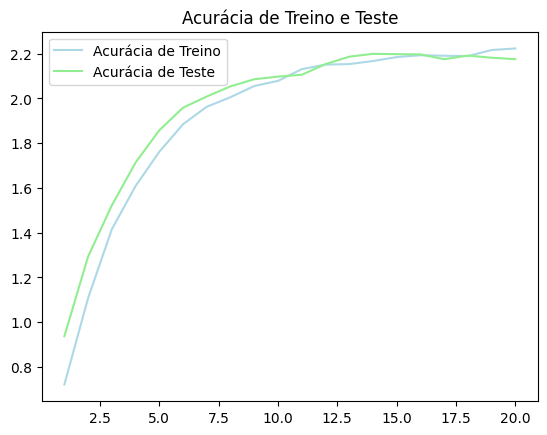

In [27]:
# Aplicando função aos resultados de treino e teste

plt.plot(epochs, suaviza(acc), 'lightblue', label = 'Acurácia de Treino')
plt.plot(epochs, suaviza(val_acc), 'lightgreen', label = 'Acurácia de Teste')
plt.title('Acurácia de Treino e Teste')
plt.legend()

plt.show();

### **8. Testando o Modelo**

In [28]:
# Selecionando 10 imagens a partir do conjunto de teste

X_teste, y_teste = processamento_de_imagens(pictures_teste[0:10])

In [29]:
# Transformando a lista de imagens em array e reescalando os pixels
from keras.preprocessing.image import ImageDataGenerator

x = np.array(X_teste)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

1/1 [==============================] - 0s 374ms/step


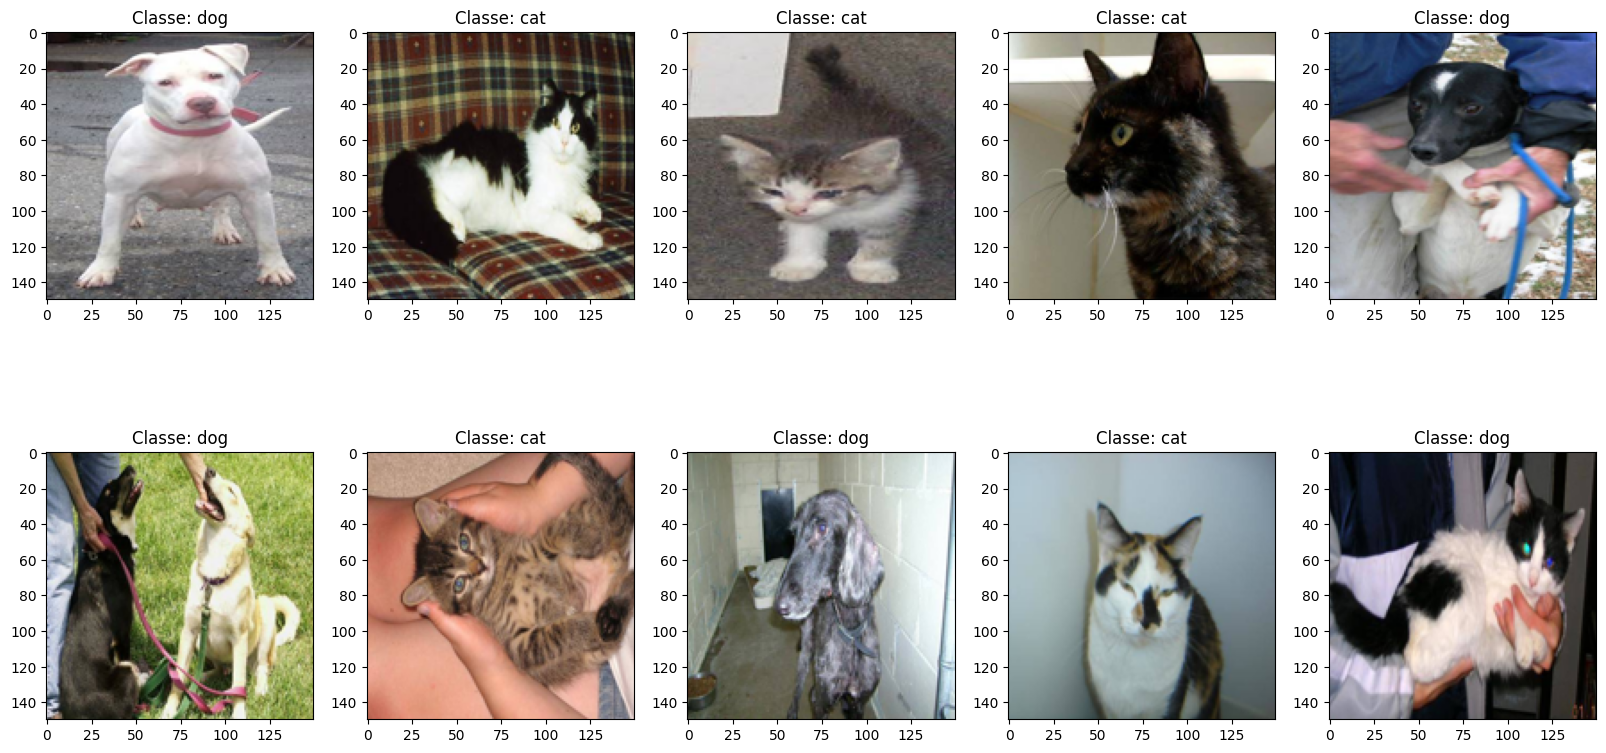

In [32]:
# Plotando as imagens e suas respectivas classes

i = 0
columns = 5
text_labels = []

plt.figure(figsize = (20, 10))

for batch in test_datagen.flow(x, batch_size = 1):
  pred = (modelo.predict(batch) > 0.5).astype("int32")
  if pred == 1:
    text_labels.append('dog')
  else:
    text_labels.append('cat')

  plt.subplot(int(5 / columns + 1), int(columns), i + 1)
  plt.title('Classe: ' + text_labels[i])

  imgplot = plt.imshow(batch[0])
  i += 1
  if i % 10 == 0:
    break

plt.show();

### **9.Conclusão**

<p align="justify">
Ao final deste projeto de Aprendizado de Máquina usando Transfer Learning com o conjunto de dados "Cats and Dogs", emergem insights valiosos sobre o potencial transformador dessa abordagem. A jornada de exploração nos permitiu compreender não apenas os princípios fundamentais do Transfer Learning, mas também sua aplicação prática em um contexto real.
<p align="justify">
Através da alavancagem de modelos pré-treinados, fomos capazes de superar desafios significativos na classificação de imagens de gatos e cachorros. Ao capitalizar o conhecimento acumulado em tarefas relacionadas, demos vida a modelos que não apenas aprenderam a diferenciar entre essas duas classes, mas também demonstraram a capacidade de generalização para novas imagens não vistas durante o treinamento.
<p align="justify">
Exploramos a importância da prevenção do overfitting, implementando estratégias como o Data Augmentation para aumentar a variedade e a quantidade dos dados de treinamento. Isso não apenas melhorou o desempenho do modelo, mas também mitigou a tendência de adaptação excessiva aos dados de treinamento.
<p align="justify">
A medida em que concluímos este projeto, é evidente que o Transfer Learning e suas técnicas associadas desempenham um papel crucial na capacidade de construir modelos de Aprendizado de Máquina eficazes, especialmente quando os recursos e os dados são limitados. O sucesso alcançado na classificação de imagens de gatos e cachorros é um reflexo do potencial do Transfer Learning para várias outras aplicações e cenários desafiadores.
<p align="justify">
No entanto, é importante ressaltar que a jornada não termina aqui. À medida que o campo de Aprendizado de Máquina continua a evoluir, o aprendizado adquirido neste projeto pode ser aplicado a novos conjuntos de dados e problemas complexos. A busca por melhores arquiteturas, técnicas de ajuste fino e estratégias de aumento de dados é interminável, impulsionando-nos a continuar explorando as fronteiras do conhecimento e da inovação.